In [82]:
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [57]:
df = pd.read_csv(
'IBM-HR-Employee-Attrition Dataset.csv')

In [58]:
df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [60]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


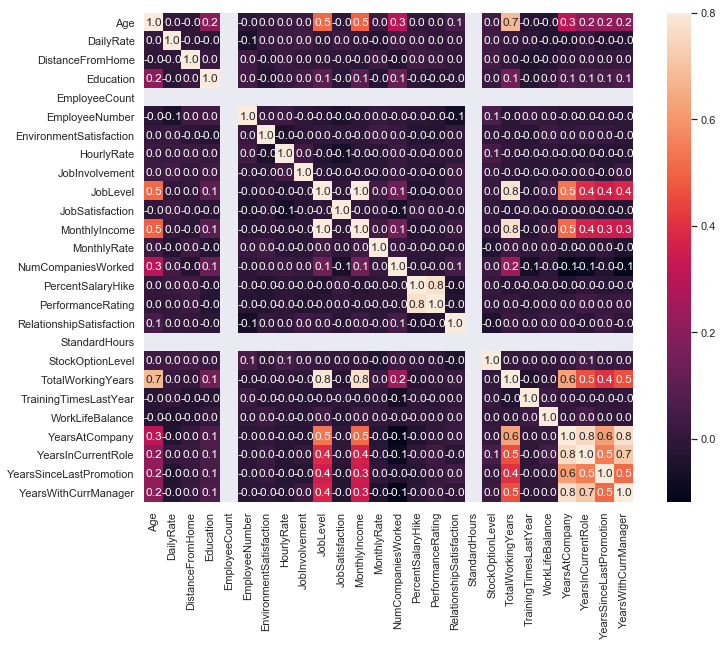

In [61]:
corr =df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True,fmt= '.1f',vmax=.8, square=True)

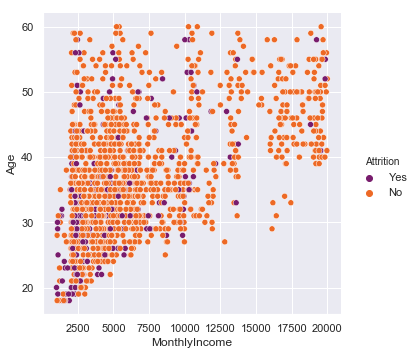

In [62]:
sns.pairplot(df, x_vars=['MonthlyIncome'], y_vars=['Age'],height=5, hue='Attrition',palette="inferno")

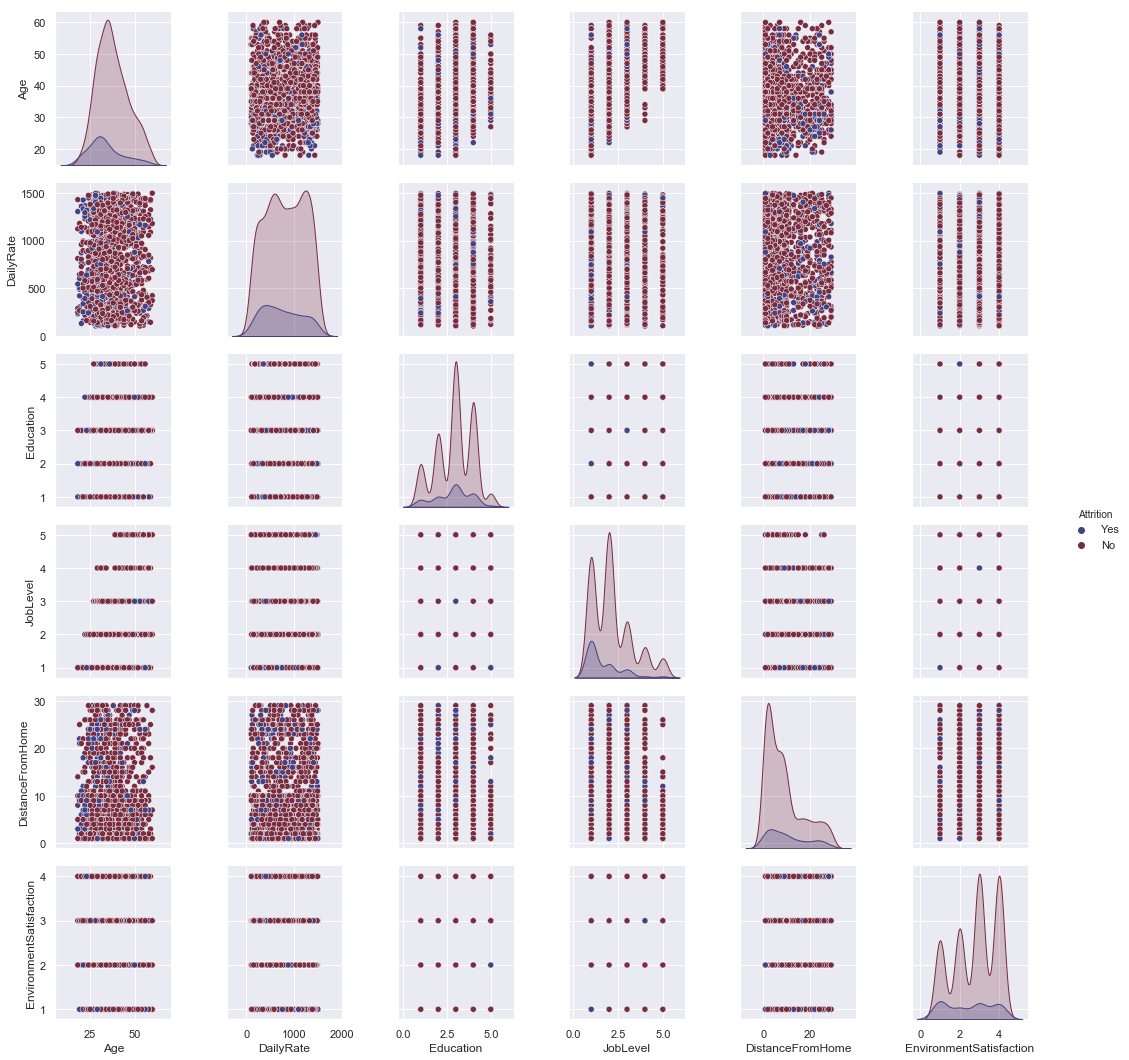

In [63]:
sns.set()
cols=['Age','DailyRate','Education','JobLevel','DistanceFromHome','EnvironmentSatisfaction','Attrition']
sns.pairplot(df[cols],hue='Attrition',height=2.5,palette="icefire")

In [64]:
data1=df
di={"Yes": 1, "No": 0}
data1["Attrition"].replace(di,inplace=True)

In [65]:
attrition=df
data1.shape
target=df.iloc[:,1]
print(target.head(5))

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64


In [66]:
print(target.dtypes)
target=pd.DataFrame(target)
print(target.dtypes)

int64
Attrition    int64
dtype: object


In [67]:
print(data1.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [68]:
data1.head(5)
data1.drop(["Attrition","Over18","StandardHours","EmployeeCount","EmployeeNumber"],axis=1,inplace=True)
#Since Attrition is the target variable we do not need it in our predictor variables. Apart from these from value_counts of each variable we can see that 'Over18', 'StandardHours', 'EmployeeCount' are all same values and can be dropped without loss of information.

In [69]:
#Converting categorical features to dummy variables. I have used get_dummies method of pandas for the same.
categorical=data1.select_dtypes(include=['object']).columns
data1.shape
print(data1.columns)
print(categorical)
Prediction=data1

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


In [70]:
print(data1.columns)
dummie=pd.get_dummies(data=data1, columns=['OverTime','BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole','MaritalStatus'])
dummie=pd.DataFrame(dummie)
new_data=pd.concat([data1, dummie], axis=1)
# print(new_data.columns)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [71]:
new_data.drop(['OverTime','BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole','MaritalStatus'],axis=1,inplace=True)
# Since we have already created dummy variables so we can drop the columns with categorical features.

In [72]:

x_train, x_test, y_train, y_test = train_test_split(new_data,target,test_size=0.33,random_state=7)

In [73]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=1000)
forest.fit(x_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=1000)

In [74]:
predicted= forest.predict(x_test)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(x_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(x_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.839
Accuracy score (validation): 0.837

Learning rate:  0.1
Accuracy score (training): 0.842
Accuracy score (validation): 0.842

Learning rate:  0.25
Accuracy score (training): 0.869
Accuracy score (validation): 0.852

Learning rate:  0.5
Accuracy score (training): 0.893
Accuracy score (validation): 0.870

Learning rate:  0.75
Accuracy score (training): 0.912
Accuracy score (validation): 0.868

Learning rate:  1
Accuracy score (training): 0.910
Accuracy score (validation): 0.856



C:\Users\Ashish Gare\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Ashish Gare\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Ashish Gare\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Ashish Gare\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [76]:
gb = GradientBoostingClassifier(n_estimators=20,learning_rate = 0.5,random_state = 7)
gb.fit(x_train, y_train)
predictions = gb.predict(x_test)

print("Confusion Matrix for Gradient boosting:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report for Gradient Boosting")
print(classification_report(y_test, predictions))

C:\Users\Ashish Gare\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Confusion Matrix for Gradient boosting:
[[381  26]
 [ 54  25]]

Classification Report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.88      0.94      0.90       407
           1       0.49      0.32      0.38        79

    accuracy                           0.84       486
   macro avg       0.68      0.63      0.64       486
weighted avg       0.81      0.84      0.82       486



In [77]:
print("Accuracy score (validation): {0:.3f}".format(forest.score(x_test, y_test)))
print("Confusion Matrix for Random Forests:")
print(confusion_matrix(y_test, predicted))
print()
print("Classification Report for Random Forests")
print(classification_report(y_test, predicted))

Accuracy score (validation): 0.860
Confusion Matrix for Random Forests:
[[402   5]
 [ 63  16]]

Classification Report for Random Forests
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       407
           1       0.76      0.20      0.32        79

    accuracy                           0.86       486
   macro avg       0.81      0.60      0.62       486
weighted avg       0.85      0.86      0.82       486



##### Standardizing the data set as the set is imbalanced

In [79]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=7, sampling_strategy = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train.as_matrix(), y_train.as_matrix())
forest_sm = RandomForestClassifier(n_estimators=500, random_state=7)
forest_sm.fit(x_train_res, y_train_res.ravel())
prediction2 = forest_sm.predict(x_test)
print("Accuracy score (validation): {0:.3f}".format(forest_sm.score(x_test, y_test)))
print("Confusion Matrix for Random Forests:")
print(confusion_matrix(y_test, prediction2))
print()
print("Classification Report for Random Forests")
print(classification_report(y_test, prediction2))

C:\Users\Ashish Gare\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy score (validation): 0.870
Confusion Matrix for Random Forests:
[[395  12]
 [ 51  28]]

Classification Report for Random Forests
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       407
           1       0.70      0.35      0.47        79

    accuracy                           0.87       486
   macro avg       0.79      0.66      0.70       486
weighted avg       0.86      0.87      0.85       486



In [80]:
gb_sm = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 7)
gb_sm.fit(x_train_res, y_train_res.ravel())
prediction3 = gb_sm.predict(x_test)

print("Confusion Matrix for Gradient boosting:")
print(confusion_matrix(y_test, prediction3))
print()
print("Classification Report for Gradient Boosting")
print(classification_report(y_test, prediction3))
print("Accuracy score (validation): {0:.3f}".format(gb_sm.score(x_test, y_test)))

Confusion Matrix for Gradient boosting:
[[369  38]
 [ 40  39]]

Classification Report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       407
           1       0.51      0.49      0.50        79

    accuracy                           0.84       486
   macro avg       0.70      0.70      0.70       486
weighted avg       0.84      0.84      0.84       486

Accuracy score (validation): 0.840


In [81]:
#feature importance with random forest plot
#gridsearch? 

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [89]:
param_grid = dict(
    n_estimators= [100, 500, 900], 
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
)

search = GridSearchCV(forest, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(x_train, y_train)

rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(x_train, y_train)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 26.1min finished
C:\Users\Ashish Gare\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Ashish Gare\Anaconda3\lib\site-packages\ipykernel_l

RandomForestClassifier(bootstrap=False, random_state=42)

In [90]:
evaluate(rf_clf, x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[826   0]
 [  0 158]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
f1-score     1.0    1.0       1.0        1.0           1.0
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
support    826.0  158.0       1.0      984.0         984.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[396  11]
 [ 60  19]]
ACCURACY SCORE:
0.8539
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
f1-score     0.917729   0.348624  0.853909    0.633176      0.825220
precision    0.868421   0.633333  0.853909    0.750877      0.830207
recall       0.972973   0.240506  0.853909    0.606740      0.853909
support    407.000000  79.000000  0.853909  486.000000    486.000000


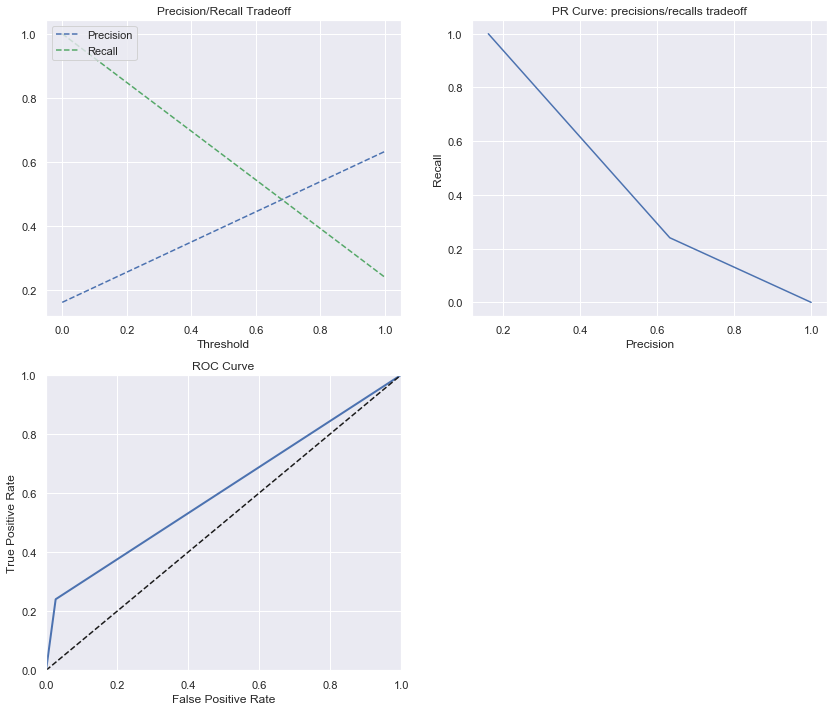

In [95]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(x_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(x_test))
plot_roc_curve(fpr, tpr)